# Load in the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_text = pd.read_csv("/content/drive/My Drive/243/FakeNewsNet/dataset/dataframe_text_no_tweets_v2.csv")

In [ ]:
df_text.head()

,Unnamed: 0,id,source,news_url,source_url,title,publish_date,body,tweet_ids,number_tweets,target
0,0,2493749932,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,dailymail,Did Miley Cyrus and Liam Hemsworth secretly ge...,2018-06-22,Congratulations might be in order for Miley Cy...,"['284329075902926848', '284332744559968256', '...",97,0
1,2,941805037,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,variety,Celebrities Join Tax March in Protest of Donal...,2017-04-15,Thousands are taking the streets to protest Pr...,"['853359353532829696', '853359576543920128', '...",86,0
2,3,2547891536,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,dailymail,Cindy Crawford's daughter Kaia Gerber wears a ...,2016-03-18,We'd venture to say that Cindy Crawford's daug...,"['988821905196158981', '988824206556172288', '...",14,0
3,4,5476631226,gossipcop,http://variety.com/2018/film/news/list-2018-os...,variety,Full List of 2018 Oscar Nominations – Variety,2018-01-23,Oscar nominations for the 90th annual awards w...,"['955792793632432131', '955795063925301249', '...",66,0
4,5,5189580095,gossipcop,http://www.townandcountrymag.com/society/tradi...,townandcountrymag,Here's What Really Happened When JFK Jr. Met P...,2017-06-29,"During the summer of 1995, John F. Kennedy Jr....","['890253005299351552', '890401381814870016', '...",4,0


# Data Analysis: False vs True articles

## Sum

In [ ]:
sum_tweets = df_text.groupby(['target']).agg({'number_tweets':'sum'})
sum_tweets

,number_tweets
target,
0,602964
1,1044452


Target = 0: article is false    
Target = 1: article is true

([<matplotlib.axis.YTick at 0x7fe582d92bd0>,
 <a list of 6 Text major ticklabel objects>)

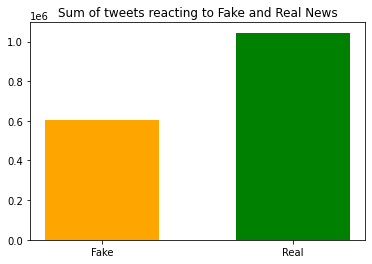

In [ ]:
plt.bar(x = sum_tweets.index, height = sum_tweets['number_tweets'], color = ['orange', 'green'], width = 0.6)
plt.title('Sum of tweets reacting to Fake and Real News')
plt.xticks([0,1], ['Fake', 'Real']) 
plt.yticks(range(0,1100000,200000)) 

## Mean

In [ ]:
mean_tweets = df_text.groupby(['target']).agg({'number_tweets':'mean'})
mean_tweets

,number_tweets
target,
0,134.440134
1,71.946821


In [ ]:
mean_tweets = df_text.groupby(['target']).agg({'number_tweets':'std'})
mean_tweets

,number_tweets
target,
0,591.676932
1,463.019191


([<matplotlib.axis.XTick at 0x7fe582d29150>,
 [Text(0, 0, 'Fake'), Text(0, 0, 'Real')])

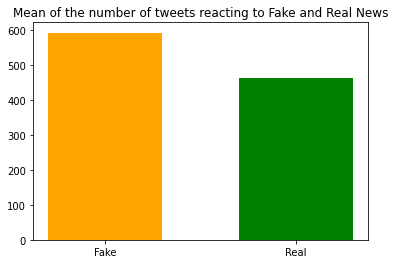

In [ ]:
plt.bar(x = mean_tweets.index, height = mean_tweets['number_tweets'], color = ['orange', 'green'], width = 0.6)
plt.title('Mean of the number of tweets reacting to Fake and Real News')
plt.xticks([0,1], ['Fake', 'Real']) 

## Splitted by source

### Sum

In [ ]:
sum_tweets_source = df_text.groupby(['target', 'source']).agg({'number_tweets':'sum'})
sum_tweets_source

number_tweets
target source                   
0      gossipcop          483638
       politifact         119326
1      gossipcop          754164
       politifact         290288

In [ ]:
sum_tweets_source.index

MultiIndex([(0,  'gossipcop'),
            (0, 'politifact'),
            (1,  'gossipcop'),
            (1, 'politifact')],
           names=['target', 'source'])

Text(0.5, 1.0, 'Sum of tweets reacting to Fake and Real News according to the source')

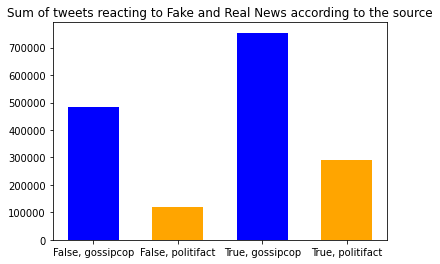

In [ ]:
plt.bar(x = ['False, gossipcop','False, politifact','True, gossipcop','True, politifact'], 
        height = sum_tweets_source['number_tweets'], color = ['blue', 'orange'], width = 0.6)
plt.title('Sum of tweets reacting to Fake and Real News according to the source')

### Mean

In [ ]:
mean_tweets_source = df_text.groupby(['target', 'source']).agg({'number_tweets':'mean'})
mean_tweets_source

number_tweets
target source                   
0      gossipcop      115.069712
       politifact     423.141844
1      gossipcop       53.445114
       politifact     714.995074

Text(0.5, 1.0, 'Mean of the number of tweets reacting to Fake and Real News according to the source')

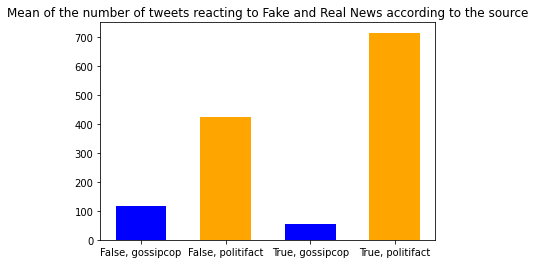

In [ ]:
plt.bar(x = ['False, gossipcop','False, politifact','True, gossipcop','True, politifact'], 
        height = mean_tweets_source['number_tweets'], color = ['blue', 'orange'], width = 0.6)
plt.title('Mean of the number of tweets reacting to Fake and Real News according to the source')

### Standard deviation

In [ ]:
std_tweets_source = df_text.groupby(['target', 'source']).agg({'number_tweets':'std'})
std_tweets_source

number_tweets
target source                   
0      gossipcop      279.670675
       politifact    2080.259870
1      gossipcop       81.330912
       politifact    2650.873993

Text(0.5, 1.0, 'Standard deviation of the number of tweets reacting to Fake and Real News according to the source')

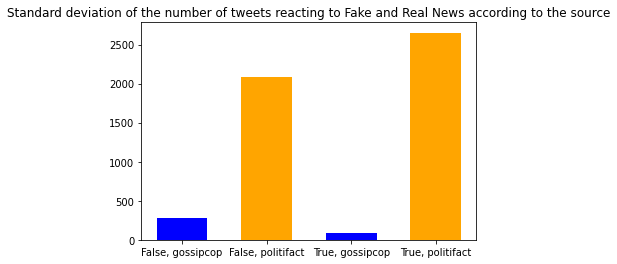

In [ ]:
plt.bar(x = ['False, gossipcop','False, politifact','True, gossipcop','True, politifact'], 
        height = std_tweets_source['number_tweets'], color = ['blue', 'orange'], width = 0.6)
plt.title('Standard deviation of the number of tweets reacting to Fake and Real News according to the source')

## Distribution of the number of tweets

### False vs True articles

In [ ]:
df_text_false = df_text.where(df_text['target'] == 0)
df_text_false

,Unnamed: 0,id,source,news_url,source_url,title,publish_date,body,tweet_ids,number_tweets,target
0,0.0,2.493750e+09,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,dailymail,Did Miley Cyrus and Liam Hemsworth secretly ge...,2018-06-22,Congratulations might be in order for Miley Cy...,"['284329075902926848', '284332744559968256', '...",97.0,0.0
1,2.0,9.418050e+08,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,variety,Celebrities Join Tax March in Protest of Donal...,2017-04-15,Thousands are taking the streets to protest Pr...,"['853359353532829696', '853359576543920128', '...",86.0,0.0
2,3.0,2.547892e+09,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,dailymail,Cindy Crawford's daughter Kaia Gerber wears a ...,2016-03-18,We'd venture to say that Cindy Crawford's daug...,"['988821905196158981', '988824206556172288', '...",14.0,0.0
3,4.0,5.476631e+09,gossipcop,http://variety.com/2018/film/news/list-2018-os...,variety,Full List of 2018 Oscar Nominations – Variety,2018-01-23,Oscar nominations for the 90th annual awards w...,"['955792793632432131', '955795063925301249', '...",66.0,0.0
4,5.0,5.189580e+09,gossipcop,http://www.townandcountrymag.com/society/tradi...,townandcountrymag,Here's What Really Happened When JFK Jr. Met P...,2017-06-29,"During the summer of 1995, John F. Kennedy Jr....","['890253005299351552', '890401381814870016', '...",4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_text_false = df_text_false.dropna(subset = ['number_tweets'], axis=0)
df_text_false

,Unnamed: 0,id,source,news_url,source_url,title,publish_date,body,tweet_ids,number_tweets,target
0,0.0,2.493750e+09,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,dailymail,Did Miley Cyrus and Liam Hemsworth secretly ge...,2018-06-22,Congratulations might be in order for Miley Cy...,"['284329075902926848', '284332744559968256', '...",97.0,0.0
1,2.0,9.418050e+08,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,variety,Celebrities Join Tax March in Protest of Donal...,2017-04-15,Thousands are taking the streets to protest Pr...,"['853359353532829696', '853359576543920128', '...",86.0,0.0
2,3.0,2.547892e+09,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,dailymail,Cindy Crawford's daughter Kaia Gerber wears a ...,2016-03-18,We'd venture to say that Cindy Crawford's daug...,"['988821905196158981', '988824206556172288', '...",14.0,0.0
3,4.0,5.476631e+09,gossipcop,http://variety.com/2018/film/news/list-2018-os...,variety,Full List of 2018 Oscar Nominations – Variety,2018-01-23,Oscar nominations for the 90th annual awards w...,"['955792793632432131', '955795063925301249', '...",66.0,0.0
4,5.0,5.189580e+09,gossipcop,http://www.townandcountrymag.com/society/tradi...,townandcountrymag,Here's What Really Happened When JFK Jr. Met P...,2017-06-29,"During the summer of 1995, John F. Kennedy Jr....","['890253005299351552', '890401381814870016', '...",4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18591,22560.0,1.376600e+04,politifact,http://ladylibertysnews.com/muslims-offended-k...,ladylibertysnews,Radical Muslims in Australia OFFENDED That The...,NaN,ladylibertysnews.com\n\nThis Domain Name Has E...,"['792890826321985537', '793144119249907712', '...",125.0,0.0
18592,22562.0,1.415800e+04,politifact,https://web.archive.org/web/20170602190500/htt...,archive,WORSE THAN HITLER! Trey Gowdy’s Son Found In A...,2017-05-20,You have probably heard the news about Trey Go...,['865933040492703745'],1.0,0.0
18593,22563.0,1.347500e+04,politifact,http://genius.com/discussions/219349-Donald-tr...,genius,Donald Trump Protester Speaks Out: “I Was Paid...,NaN,Genius Nickname\n\nEmail\n\nPassword\n\nBy cli...,"['739971101288239104', '739984202116960256', '...",1025.0,0.0
18594,22567.0,1.494400e+04,politifact,http://thehill.com/homenews/senate/369928-who-...,thehill,Who is affected by the government shutdown?,2018-01-20,Thousands of government workers are unsure whe...,"['954602090462146560', '954602093171609600', '...",3.0,0.0


In [ ]:
df_text_false.describe()

,Unnamed: 0,id,number_tweets,target
count,4485.000000,4.485000e+03,4485.000000,4485.0
mean,3884.049498,4.721012e+09,134.440134,0.0
std,5008.529384,3.056486e+09,591.676932,0.0
min,0.000000,1.177300e+04,1.000000,0.0
25%,1400.000000,1.992584e+09,5.000000,0.0
50%,2813.000000,4.750283e+09,14.000000,0.0
75%,4241.000000,7.341416e+09,54.000000,0.0
max,22570.000000,9.997057e+09,29060.000000,0.0


Only the column number_tweets is relevant.    
As we can see, the standard deviation is very high, so we can conclude that the values are very scattered, and the mean might not be very relevant. By looking at the quartiles (and especially the median and the 75% quartile), we can conclude that there are a lot of values very low, and very few articles which generates a huge amount of tweets (probably the hot topic).    
In that case, it might be more relevant to study the median instead of the mean.

In [ ]:
df_text_true = df_text.where(df_text['target'] == 1)
df_text_true = df_text_true.dropna(subset = ['number_tweets'], axis=0)
df_text_true

,Unnamed: 0,id,source,news_url,source_url,title,publish_date,body,tweet_ids,number_tweets,target
4203,5323.0,882573.0,gossipcop,https://www.brides.com/story/teen-mom-jenelle-...,brides,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,NaN,The wedding industry is always evolving and we...,"['912371411146149888', '912371528343408641', '...",67.0,1.0
4204,5324.0,875924.0,gossipcop,https://www.dailymail.co.uk/tvshowbiz/article-...,dailymail,Kylie Jenner refusing to discuss Tyga on Life ...,2017-07-05,Kylie Jenner reportedly doesn't want to talk a...,"['901989917546426369', '901989992074969089', '...",51.0,1.0
4205,5325.0,894416.0,gossipcop,https://en.wikipedia.org/wiki/Quinn_Perkins,en,Quinn Perkins,NaN,Character on American television series Scanda...,"['931263637246881792', '931265332022579201', '...",48.0,1.0
4206,5326.0,857248.0,gossipcop,https://www.refinery29.com/en-us/2018/03/19192...,refinery29,I Tried Kim Kardashian's Butt Workout & Am For...,2018-03-19,"From there, you transition to the leg press ma...","['868114761723936769', '868122567910936576', '...",53.0,1.0
4207,5327.0,884684.0,gossipcop,https://www.cnn.com/2017/10/04/entertainment/c...,cnn,Celine Dion donates concert proceeds to Vegas ...,2017-10-04,Celine Dion pledges proceeds from the show at ...,"['915528047004209152', '915529285171122176', '...",291.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18997,23188.0,1204.0,politifact,http://select.nytimes.com/gst/abstract.html?re...,nytimes,IMPEACHMENT HINT STIRS HOUSE CLASH; Democratic...,1935-07-24,Full text is unavailable for this digitized ar...,['nan'],1.0,1.0
18998,23189.0,6931.0,politifact,http://www.politifact.com/truth-o-meter/promis...,politifact,The Obameter: Introduce a comprehensive immigr...,NaN,Immigration reform was a major component of Pr...,"['21096374968', '21096771824', '94134529928765...",137.0,1.0
18999,23190.0,13619.0,politifact,http://www.cnn.com/2017/01/05/politics/border-...,cnn,"Trump asking Congress, not Mexico, to pay for ...",2017-01-05,Story highlights The Trump transition team say...,"['817357495047979008', '817357627566985217', '...",976.0,1.0
19000,23192.0,329.0,politifact,https://web.archive.org/web/20080131000131/htt...,archive,Change We Can Believe In,2008-01-30,Remarks of Senator Barack Obama: The Past Vers...,"['634287923135909888', '946743411100536832', '...",182.0,1.0


In [ ]:
df_text_true.describe()

,Unnamed: 0,id,number_tweets,target
count,14517.000000,14517.000000,14517.000000,14517.0
mean,13972.734794,871162.009506,71.946821,1.0
std,5025.721286,150252.971616,463.019191,0.0
min,5323.000000,20.000000,1.000000,1.0
25%,9614.000000,868602.000000,17.000000,1.0
50%,13982.000000,894931.000000,45.000000,1.0
75%,18277.000000,918699.000000,66.000000,1.0
max,23195.000000,956103.000000,27377.000000,1.0


Only the column number_tweets is relevant.    
As we can see, the standard deviation is very high, so we can conclude that the values are very scattered, and the mean might not be very relevant. By looking at the quartiles (and especially the median and the 75% quartile), we can conclude that there are a lot of values very low, and very few articles which generates a huge amount of tweets (probably the hot topic).    
In that case, it might be more relevant to study the median instead of the mean.

Text(0.5, 1.0, 'Distribution of the number of tweets reacting to Fake and Real News')

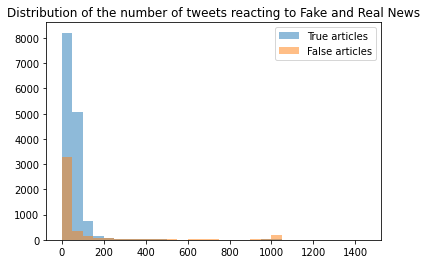

In [ ]:
from matplotlib.patches import Rectangle

bins = range(0,1500, 50)
plt.hist(df_text_true['number_tweets'], bins = bins, alpha=0.5)
plt.hist(df_text_false['number_tweets'], bins = bins, alpha=0.5)

colors = ["blue", "orange"]
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["True articles", "False articles"]
plt.legend(labels)
plt.title('Distribution of the number of tweets reacting to Fake and Real News')

**Comparison**

In [ ]:
comparison = pd.concat([df_text_true.describe()['number_tweets'],df_text_false.describe()['number_tweets']], axis = 1)
#comparison.rename(columns = {'number_tweets':'True articles', 'number_tweets':'False articles'}, inplace = True) 
comparison

,number_tweets,number_tweets
count,14517.000000,4485.000000
mean,71.946821,134.440134
std,463.019191,591.676932
min,1.000000,1.000000
25%,17.000000,5.000000
50%,45.000000,14.000000
75%,66.000000,54.000000
max,27377.000000,29060.000000


The mean is twice higher when the article is false, the standard deviation as well (the number of tweets varies more). By looking at the quartiles, it is because only a few false articles generate a lot of tweets.

In [ ]:
real_tweets = df_text_true['number_tweets'].to_list
fake_tweets = df_text_false['number_tweets'].to_list

array([ 67.,  51.,  48., ..., 976., 182.,   2.])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


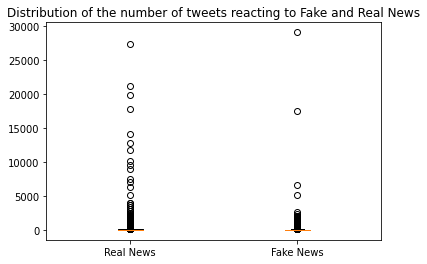

In [ ]:
import pylab

plt.boxplot([df_text_true['number_tweets'].values, df_text_false['number_tweets'].values])
pylab.xticks([1,2], ['Real News', 'Fake News'])
plt.title('Distribution of the number of tweets reacting to Fake and Real News')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


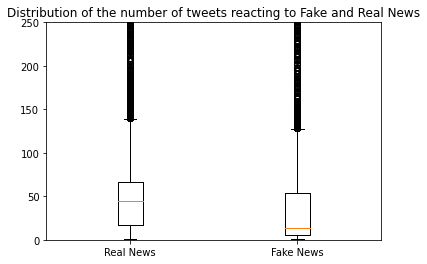

In [ ]:
plt.boxplot([df_text_true['number_tweets'].values, df_text_false['number_tweets'].values])
plt.ylim(0,250)
pylab.xticks([1,2], ['Real News', 'Fake News'])
plt.title('Distribution of the number of tweets reacting to Fake and Real News')
plt.show()

### False vs True according to the source of the article


In [ ]:
df_text_false_gossipcop = df_text_false.where(df_text_false['source'] == 'gossipcop')
df_text_false_gossipcop = df_text_false_gossipcop.dropna(subset = ['number_tweets'], axis=0)
df_text_false_gossipcop

,Unnamed: 0,id,source,news_url,source_url,title,publish_date,body,tweet_ids,number_tweets,target
0,0.0,2.493750e+09,gossipcop,http://www.dailymail.co.uk/tvshowbiz/article-5...,dailymail,Did Miley Cyrus and Liam Hemsworth secretly ge...,2018-06-22,Congratulations might be in order for Miley Cy...,"['284329075902926848', '284332744559968256', '...",97.0,0.0
1,2.0,9.418050e+08,gossipcop,http://variety.com/2017/biz/news/tax-march-don...,variety,Celebrities Join Tax March in Protest of Donal...,2017-04-15,Thousands are taking the streets to protest Pr...,"['853359353532829696', '853359576543920128', '...",86.0,0.0
2,3.0,2.547892e+09,gossipcop,http://www.dailymail.co.uk/femail/article-3499...,dailymail,Cindy Crawford's daughter Kaia Gerber wears a ...,2016-03-18,We'd venture to say that Cindy Crawford's daug...,"['988821905196158981', '988824206556172288', '...",14.0,0.0
3,4.0,5.476631e+09,gossipcop,http://variety.com/2018/film/news/list-2018-os...,variety,Full List of 2018 Oscar Nominations – Variety,2018-01-23,Oscar nominations for the 90th annual awards w...,"['955792793632432131', '955795063925301249', '...",66.0,0.0
4,5.0,5.189580e+09,gossipcop,http://www.townandcountrymag.com/society/tradi...,townandcountrymag,Here's What Really Happened When JFK Jr. Met P...,2017-06-29,"During the summer of 1995, John F. Kennedy Jr....","['890253005299351552', '890401381814870016', '...",4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4198,5318.0,6.702261e+09,gossipcop,http://www.huffingtonpost.com/2012/09/11/septe...,huffingtonpost,September 11: Celebrities Remember 9/11 (TWEETS),2012-09-11,"NEW YORK, NY - SEPTEMBER 10: Germano Riviera w...",['245643768638894080'],1.0,0.0
4199,5319.0,6.051845e+09,gossipcop,http://www.dailymail.co.uk/news/article-491567...,dailymail,NASCAR owners threaten to fire drivers who pro...,2017-09-24,"No drivers, crew or other team members protest...","['912048333413330944', '912048571482087424', '...",447.0,0.0
4200,5320.0,2.435526e+09,gossipcop,http://www.telegraph.co.uk/men/the-filter/7-si...,telegraph,The 7 signs that David Beckham is definitely h...,2017-08-16,For the uninitiated a midlife crisis is roughl...,"['897794716447539200', '897804460830928896', '...",13.0,0.0
4201,5321.0,4.576153e+09,gossipcop,http://www.vanityfair.com/style/2016/09/ryan-g...,vanityfair,Ryan Gosling and Eva Mendes Did Not Get Marrie...,2016-09-21,"Update (September 21, 2:50 P.M.): A source clo...","['778678901572710400', '778681718714740736', '...",7.0,0.0


In [ ]:
df_text_true_gossipcop = df_text_true.where(df_text_true['source'] == 'gossipcop')
df_text_true_gossipcop = df_text_true_gossipcop.dropna(subset = ['number_tweets'], axis=0)

df_text_false_politifact = df_text_false.where(df_text_false['source'] == 'politifact')
df_text_false_politifact = df_text_false_politifact.dropna(subset = ['number_tweets'], axis=0)

df_text_true_politifact = df_text_true.where(df_text_true['source'] == 'politifact')
df_text_true_politifact = df_text_true_politifact.dropna(subset = ['number_tweets'], axis=0)

In [ ]:
comparison = pd.concat([df_text_false_gossipcop.describe()['number_tweets'],df_text_true_gossipcop.describe()['number_tweets'],
                        df_text_false_politifact.describe()['number_tweets'],df_text_true_politifact.describe()['number_tweets']], axis = 1)
print('False - gossipcop, True - gossipcop, False - politifact, True - politifact')
comparison

False - gossipcop, True - gossipcop, False - politifact, True - politifact


,number_tweets,number_tweets,number_tweets,number_tweets
count,4203.000000,14111.000000,282.000000,406.000000
mean,115.069712,53.445114,423.141844,714.995074
std,279.670675,81.330912,2080.259870,2650.873993
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,18.000000,9.000000,1.000000
50%,13.000000,45.000000,80.000000,9.500000
75%,48.000000,66.000000,268.250000,181.500000
max,2568.000000,2082.000000,29060.000000,27377.000000


Articles from the website politifact generate more tweets than those from the article gossipcop. Although, the number of tweets reacting to an article varies a lot according to the article for politifact than for gossipcop.    
The maximum number of tweets for an article is ten times higher for politifact than for gossipcop. But, for both sources, we notice that the 75% quartiles is quite compared to the mean and the maximum, which shows again that a few articles generated a lot of tweets, independently of if the article is true or false.

**Politifact**

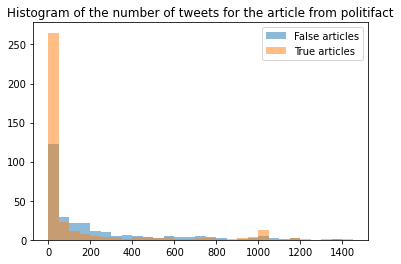

In [ ]:
bins = range(0,1500, 50)
plt.hist(df_text_false_politifact['number_tweets'], bins = bins, alpha=0.5)
plt.hist(df_text_true_politifact['number_tweets'], bins = bins, alpha=0.5)
plt.title('Histogram of the number of tweets for the article from politifact')
colors = ["orange", "blue"]
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["False articles", "True articles"]
plt.legend(labels)

**Gossipcop**

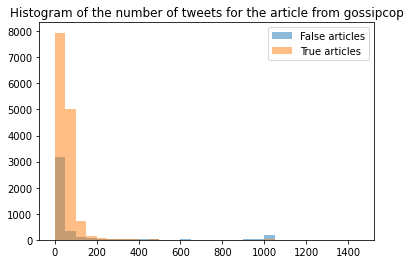

In [ ]:
bins = range(0,1500, 50)
plt.hist(df_text_false_gossipcop['number_tweets'], bins = bins, alpha=0.5)
plt.hist(df_text_true_gossipcop['number_tweets'], bins = bins, alpha=0.5)
plt.title('Histogram of the number of tweets for the article from gossipcop')
colors = ["orange", "blue"]
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["False articles", "True articles"]
plt.legend(labels)